# Credit Card Approval Classification

- The purpose of this Jupyter notebook is to predict whether a potential client should be approved or denied from receiving a new credit card.


## Step 1: Import all the required Python libraries

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, precision_score

## Step 2: Read the data

- This classification problem requires the analysis of two different .csv files:
    - application_record.csv
    - credit_record.csv
- *Both* files contain important information that may be required to train a model. Therefore, the attributes (columns) from both files, many of which could potentially serve as predictors, must be combined into a single dataset.


In [66]:
app_record_data = pd.read_csv("application_record.csv")
credit_record_data = pd.read_csv("credit_record.csv")

#### **application_record.csv dataset**

In [67]:
app_record_data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1


In [68]:
# Outputs all information from the first row (index 0).
# The output below is included in case this Jupyter notebook is converted to a different format (PDF, HTML, etc.), and the latter columns are cut off.
app_record_data.iloc[0]

,0
ID,5008804
CODE_GENDER,M
FLAG_OWN_CAR,Y
FLAG_OWN_REALTY,Y
CNT_CHILDREN,0
AMT_INCOME_TOTAL,427500.0
NAME_INCOME_TYPE,Working
NAME_EDUCATION_TYPE,Higher education
NAME_FAMILY_STATUS,Civil marriage
NAME_HOUSING_TYPE,Rented apartment


In [69]:
app_record_data.tail()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2
438556,6842885,F,N,Y,0,121500.0,Working,Secondary / secondary special,Married,House / apartment,-18858,-1201,1,0,1,0,Sales staff,2


In [70]:
app_record_data.iloc[438556]

,438556
ID,6842885
CODE_GENDER,F
FLAG_OWN_CAR,N
FLAG_OWN_REALTY,Y
CNT_CHILDREN,0
AMT_INCOME_TOTAL,121500.0
NAME_INCOME_TYPE,Working
NAME_EDUCATION_TYPE,Secondary / secondary special
NAME_FAMILY_STATUS,Married
NAME_HOUSING_TYPE,House / apartment


In [71]:
app_record_data.shape

(438557, 18)

#### **credit_record.csv dataset**

In [72]:
credit_record_data.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [73]:
credit_record_data.tail()

,ID,MONTHS_BALANCE,STATUS
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C
1048574,5150487,-29,C


In [74]:
credit_record_data.shape

(1048575, 3)

- In the **credit_record.csv** file, there are eight different classes for payment status for each entry in one's credit report. The number of data entries in each class is demonstrated in the cell below. Each class is represented by a letter and carries these meanings:
    - C = Paid for the month.
    - X = No required payment for the month.
    - 0 = less than 30 days late.
    - 1 = 30-59 days late.
    - 2 = 60-89 days late.
    - 3 = 90-119 days late.
    - 4 = 120-149 days late.
    - 5 = 150+ days late.
- However, we want to convert those 8 classes into 2 classes to make it a binary classification problem. This decision will make it easier to determine whether someone should or should not obtain a credit card.

In [75]:
credit_record_data["STATUS"].value_counts()

,count
STATUS,
C,442031
0,383120
X,209230
1,11090
5,1693
2,868
3,320
4,223


## Step 3: Clean the data

### 3.1: Handle missing data and duplicates

#### **application_record.csv dataset**

##### **Find and handle missing data**

In [76]:
app_record_data.isnull().sum()

,0
ID,0
CODE_GENDER,0
FLAG_OWN_CAR,0
FLAG_OWN_REALTY,0
CNT_CHILDREN,0
AMT_INCOME_TOTAL,0
NAME_INCOME_TYPE,0
NAME_EDUCATION_TYPE,0
NAME_FAMILY_STATUS,0
NAME_HOUSING_TYPE,0


Out of the 18 columns in the **application_record.csv** dataset, only the **OCCUPATION_TYPE**
column contains missing data. The occupation column represents the job that a person has, formatted as a string. For this reason, any missing occupation values will be replaced with "Unknown."

In [77]:
def fill_missing_string_data(app_record_data):
    dataset_columns = app_record_data.select_dtypes(include=['object']).columns

    for column in dataset_columns:
        app_record_data[column] = app_record_data[column].fillna("Unknown")

    return app_record_data

app_record_data = fill_missing_string_data(app_record_data)

Now the **OCCUPATION_TYPE** column has zero missing values, as shown below.

In [78]:
app_record_data.isnull().sum()

,0
ID,0
CODE_GENDER,0
FLAG_OWN_CAR,0
FLAG_OWN_REALTY,0
CNT_CHILDREN,0
AMT_INCOME_TOTAL,0
NAME_INCOME_TYPE,0
NAME_EDUCATION_TYPE,0
NAME_FAMILY_STATUS,0
NAME_HOUSING_TYPE,0


##### **Find and handle duplicate rows**

In **application_record.csv**, any rows with repeating ID values will become deleted. Only the first instance of a unique ID will be kept in the dataset.

In [79]:
print("Number of duplicates BEFORE dropping: ", app_record_data['ID'].duplicated().sum())
print(app_record_data.shape)

Number of duplicates BEFORE dropping:  47
(438557, 18)


In [80]:
app_record_data = app_record_data.drop_duplicates(subset="ID", keep="first")

print("Number of duplicates AFTER dropping: ", app_record_data['ID'].duplicated().sum())
print(app_record_data.shape)

Number of duplicates AFTER dropping:  0
(438510, 18)


#### **credit_record.csv dataset**

##### **Find any missing data**

It turns out that no missing data or null values were found in the **credit_record.csv** dataset, as shown below.

In [81]:
credit_record_data.isnull().sum()

,0
ID,0
MONTHS_BALANCE,0
STATUS,0


##### **Find and explain duplicate data**

In [82]:
credit_record_data.shape

(1048575, 3)

In [83]:
num_of_rows = credit_record_data.shape[0]
num_unique_IDs = 0
current_ID = 0

for i in range (0, num_of_rows):
    next_ID = credit_record_data["ID"][i]
    if current_ID != next_ID:
        num_unique_IDs += 1

    current_ID = next_ID

print("Number of UNIQUE IDs: ", num_unique_IDs)
print("Total number of IDs: ", num_of_rows)

print(f"\nAverage number of payment entries: {(num_of_rows / num_unique_IDs):.2f} entries per client")
print(f"UNIQUE / TOTAL ratio: {(num_unique_IDs / num_of_rows):.3f}")

Number of UNIQUE IDs:  45985
Total number of IDs:  1048575

Average number of payment entries: 22.80 entries per client
UNIQUE / TOTAL ratio: 0.044


There are 1,048,575 rows inside of the **credit_record.csv** dataset, each with a client ID. Many of these
IDs directly correspond to a respective ID
in the **application_record.csv** dataset.

However, not every ID in the **credit_record.csv** dataset is unique. In fact, only around 4% of the dataset contains a unique client ID. That is because each row represents a payment that a client had to make, and most clients will have a credit history with multiple payments on it. For these reasons, we need to:

- Determine how to classify each client with a single target value, even though multiple rows of data exist for the same client.
- Connect the information from each ID between *both* datasets.
- Convert the 8 preexisting classes into 2 classes to simply the target values, thus creating a **binary classification** problem.


### 3.2: Determine a singular target value for each client ID

To accomplish this task, we will analyze the **credit_record.csv** dataset. We will determine the *worst* payment status for each client to obtain a singular classification for each client. Since there is an average of 23 rows of data per client, this step will *significantly* reduce the number of rows from 1,048,575.

In [84]:
worst_payment_data_list = []
id_list = []
current_ID = 0

classifier_list = ['C', 'X', '0', '1', '2', '3', '4', '5']
status_set = set()
worst_status = 'C'

for i in range(0, num_of_rows):
    next_ID = credit_record_data["ID"][i]

    # If the loop finds a different ID or it is analyzing the last row, get client ID and worst payment status.
    if (current_ID != next_ID and i != 0) or i == num_of_rows - 1:

        # Converts ordered set to list to obtain the worst payment status's index from classifier_list.
        status_list = list(status_set)
        worst_payment_element = status_list.pop()

        # Stores client's worst payment status and ID to separate lists.
        worst_payment_data_list.append(classifier_list[worst_payment_element])
        id_list.append(credit_record_data["ID"][i - 1])

        # Empties set when all the client's payment entries are analyzed.
        status_set = set()

    # Stores classification to set. Duplicate entries are not gathered, and the highest index represents the worst payment status.
    if i < num_of_rows:
        for label in classifier_list:
            if credit_record_data["STATUS"][i] == label:
                status_set.add(classifier_list.index(label))

    current_ID = next_ID

# Provides index to help create new DataFrame.
indexing = range(len(id_list))

# IDs and payment statuses combined to DataFrame.
combined_credit_data = list(zip(id_list, worst_payment_data_list))

worst_payment_data = pd.DataFrame(combined_credit_data, index=indexing, columns=["ID", "STATUS"])

In [85]:
worst_payment_data.head()

,ID,STATUS
0,5001711,0
1,5001712,0
2,5001713,X
3,5001714,X
4,5001715,X


In [86]:
worst_payment_data.tail()

,ID,STATUS
45980,5150482,0
45981,5150483,X
45982,5150484,0
45983,5150485,0
45984,5150487,C


In [87]:
worst_payment_data.shape

(45985, 2)

### 3.3: Modify target values to resemble binary classification

To create a **binary classification** problem from the two datasets, the target values for the variable STATUS will be classified as **good** (represented by a 1):

1.) C = Paid for the month.

2.) X = No required payment for the month.

3.) 0 = less than 30 days late.

Similarly, these target values will be classified as **bad** (represented by a 0):

1.) 1 = 30-59 days late.

2.) 2 = 60-89 days late.

3.) 3 = 90-119 days late.

4.) 4 = 120-149 days late.

5.) 5 = 150+ days late.s late.

In [88]:
num_of_rows = worst_payment_data.shape[0]

good_classifiers = ['C', 'X', '0']
bad_classifiers = ['1', '2', '3', '4', '5']

def binary_classification(status):
    if status in good_classifiers:
        return 1
    elif status in bad_classifiers:
        return 0

# Changes STATUS column value to a 0 or 1.
worst_payment_data["STATUS"] = worst_payment_data["STATUS"].apply(binary_classification)

In [89]:
worst_payment_data.head()

,ID,STATUS
0,5001711,1
1,5001712,1
2,5001713,1
3,5001714,1
4,5001715,1


In [90]:
worst_payment_data["STATUS"].value_counts()

,count
STATUS,
1,40635
0,5350


### 3.4: Merge the two datasets into one

The **application_record.csv** dataset originally contained 438,557 rows while the **application_record.csv** dataset
contained 1,048,575 rows. After combining the **application_record.csv** and **credit_record.csv** datasets together, the total
number of rows decreased to 36,457. This drastic decrease is due to:
- Multiple repeating client IDs in the **credit_record.csv** dataset.
- Numerous unique client IDs present in only one (but not both) of the .csv files.

For proper execution of a model, it was only possible to map unique client IDs that existed in *both* datasets. For this reason, we will now work with 36,457 clients who applied for a credit card.

In [91]:
# Creates a DataFrame with the max number of months listed on dataset for each ID.
# Values may be negative because they illustrate number of months before the CURRENT one.
months_column = credit_record_data.groupby('ID')['MONTHS_BALANCE'].agg("min").reset_index()

# Creates a DataFrame with the worst payment status from each ID.
status_column = worst_payment_data.groupby('ID')['STATUS'].agg("max").reset_index()

# All columns from both datasets are now merged into one.
app_record_data = pd.merge(app_record_data, months_column, on='ID')
app_record_data = pd.merge(app_record_data, status_column, on='ID')

In [92]:
app_record_data.shape

(36457, 20)

In [93]:
app_record_data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Unknown,2,-15,0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Unknown,2,-14,0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2,-29,1
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1,-4,1
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1,-26,1


In [94]:
# The first row contains these values in each column.
# The output below is included in case this Jupyter notebook is converted to a different format (PDF, HTML, etc.), and the latter columns are cut off.
app_record_data.iloc[0]

,0
ID,5008804
CODE_GENDER,M
FLAG_OWN_CAR,Y
FLAG_OWN_REALTY,Y
CNT_CHILDREN,0
AMT_INCOME_TOTAL,427500.0
NAME_INCOME_TYPE,Working
NAME_EDUCATION_TYPE,Higher education
NAME_FAMILY_STATUS,Civil marriage
NAME_HOUSING_TYPE,Rented apartment


### 3.5: Remove any unnecessary columns

The columns below are irrelevant for this classification problem. They do not dictate whether a client is responsible for making payments on time, nor do they
help determine whether a person should obtain a credit card. For this reason, we remove the columns below.

In [95]:
app_record_data = app_record_data.drop(["CODE_GENDER",
                                        "CNT_CHILDREN",
                                        "FLAG_MOBIL",
                                        "FLAG_WORK_PHONE",
                                        "FLAG_PHONE",
                                        "FLAG_EMAIL",
                                        "CNT_FAM_MEMBERS"], axis = 1)

### 3.6: Encode any categorical data

The following column data contain categorical (or string) values. This information is useful for the model, but the string values make it different for the model to apply it. For this reason, we apply numbers to each unique string value for each column.

In [96]:
label_encoder = preprocessing.LabelEncoder()

app_record_data['FLAG_OWN_CAR'] = label_encoder.fit_transform(app_record_data['FLAG_OWN_CAR'])
app_record_data['FLAG_OWN_REALTY'] = label_encoder.fit_transform(app_record_data['FLAG_OWN_REALTY'])
app_record_data['NAME_INCOME_TYPE'] = label_encoder.fit_transform(app_record_data['NAME_INCOME_TYPE'])
app_record_data['NAME_EDUCATION_TYPE'] = label_encoder.fit_transform(app_record_data['NAME_EDUCATION_TYPE'])
app_record_data['NAME_FAMILY_STATUS'] = label_encoder.fit_transform(app_record_data['NAME_FAMILY_STATUS'])
app_record_data['NAME_HOUSING_TYPE'] = label_encoder.fit_transform(app_record_data['NAME_HOUSING_TYPE'])
app_record_data['OCCUPATION_TYPE'] = label_encoder.fit_transform(app_record_data['OCCUPATION_TYPE'])

### 3.7: Clean the columns in app_record_data

#### **DAYS_EMPLOYED column**

The values in the column have two issues.

1.) Values that are *negative* indicate the number of days that a person was employed. Those values must be positive.

2.) Values that are *positive* indicate that an individual is unemployed or living off a pension. Those values must be changed to 0.

In [97]:
num_of_rows = app_record_data.shape[0]

def clean_days_employed_column(value):
    if value > 0:
        return 0
    elif value < 0:
        return (value * -1) // 365.25

# Changes DAYS_EMPLOYED column value to one that the model can interpret.
app_record_data["DAYS_EMPLOYED"] = app_record_data["DAYS_EMPLOYED"].apply(clean_days_employed_column)

#### **DAYS_BIRTH column**

The column's values have two problems:

1.) The values are negative. They must be converted to positive numbers.

2.) The model might perform better if the number of day that a person was employed is converted into years.

In [98]:
num_of_rows = app_record_data.shape[0]

def clean_age_column(value):
    return (value * -1) // 365.25

# Changes DAYS_BIRTH column value to one that the model can interpret.
app_record_data["DAYS_BIRTH"] = app_record_data["DAYS_BIRTH"].apply(clean_age_column)

#### **MONTHS_BALANCE column**

The model can possibly perform better if the person's length of credit history (in months) was converted into a positive number.

In [99]:
num_of_rows = app_record_data.shape[0]

def clean_credit_history_month_column(value):
    return value * -1

# Changes DAYS_EMPLOYED column value to one that the model can interpret.
app_record_data["MONTHS_BALANCE"] = app_record_data["MONTHS_BALANCE"].apply(clean_credit_history_month_column)

### 3.8: Pick better names for columns

In [100]:
app_record_data.columns = ('ID',
                           'Car_Ownership',
                           'Realty_Ownership',
                           'Yearly_Income',
                           'Income_Type',
                           'Education_Type',
                           'Family_Status',
                           'Housing_Type',
                           'Age',
                           'Years_Employed',
                           'Occupation_Type',
                           'Credit_History_Length',
                           'Status')

## Step 4: Visualize the data

### 4.1: Show histograms to illustrate data distribution

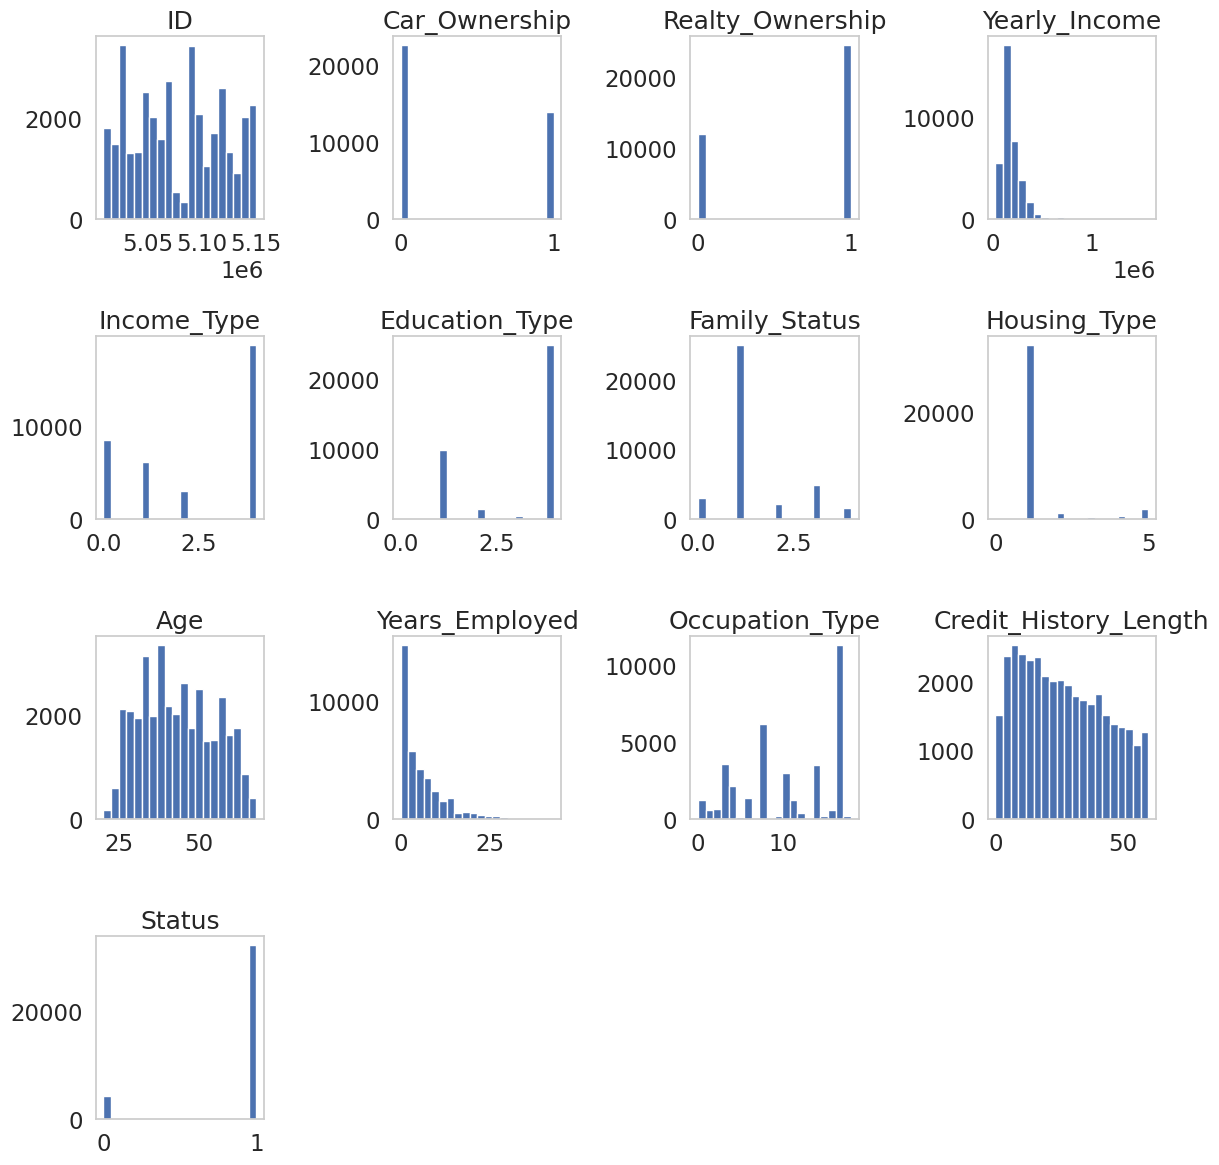

In [101]:
%matplotlib inline

histogram = app_record_data.hist(figsize=(12, 12), layout=(4, 4), bins=20, grid=False)

plt.tight_layout()
plt.show()

### 4.2: Show heatmaps to illustrate data correlation

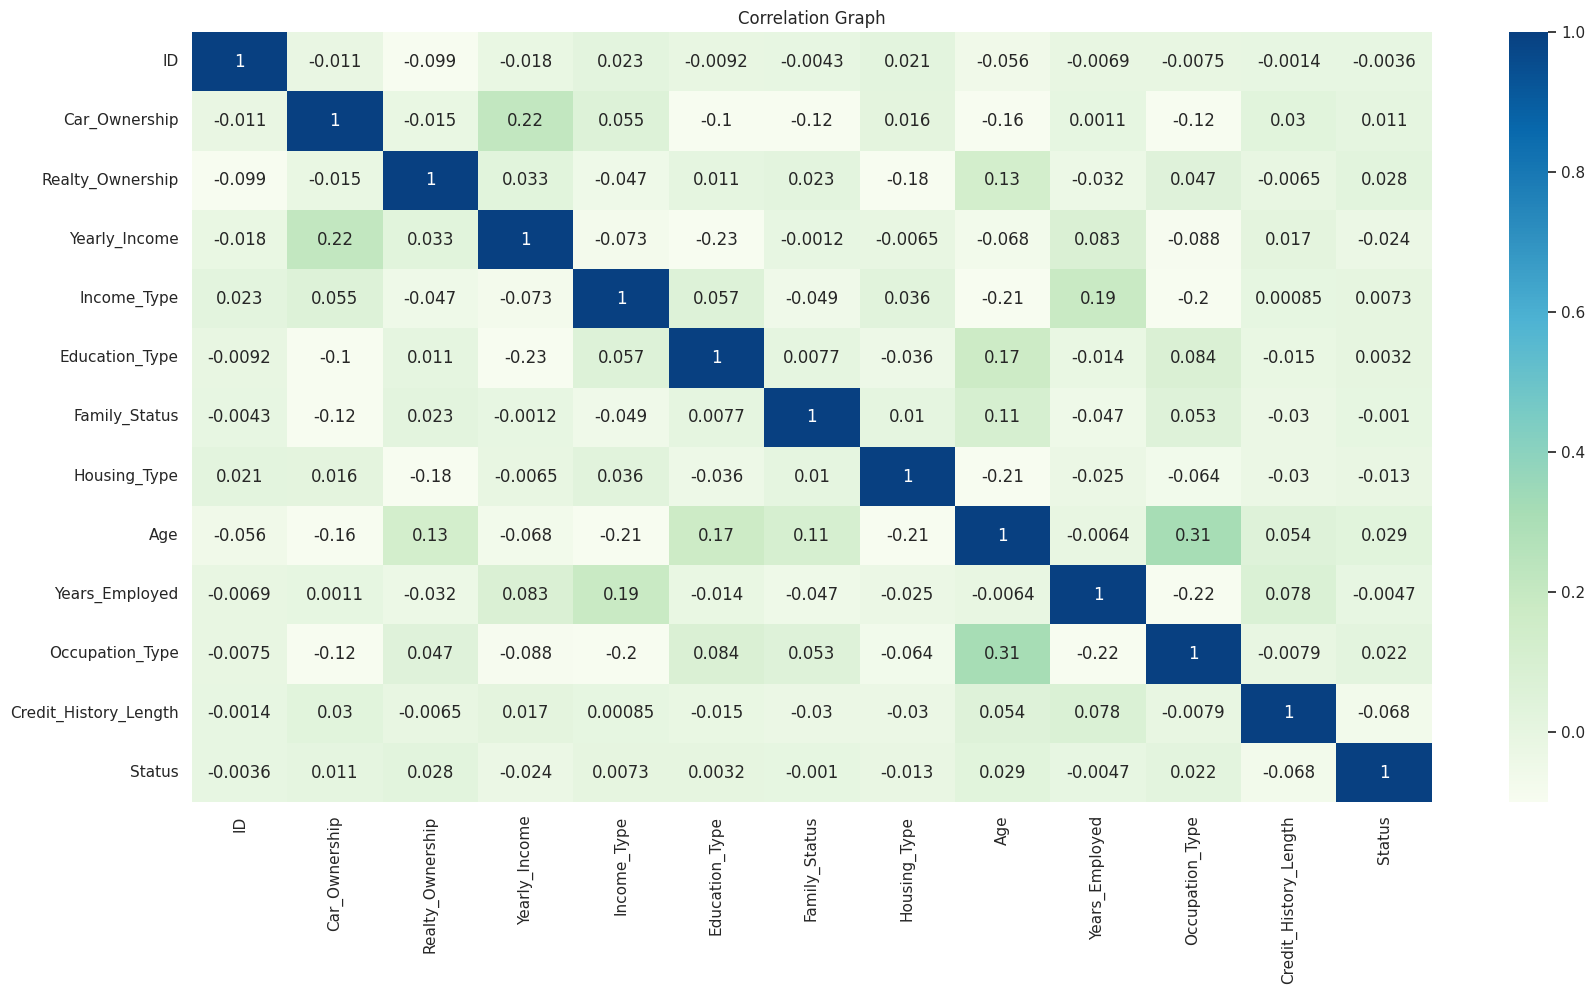

In [102]:
sns.set()
plt.figure(figsize = (20,10))
sns.heatmap(app_record_data.corr(), vmin=-0.1, vmax=1, cmap='GnBu', annot=True)
plt.title('Correlation Graph')
plt.show()

<Axes: >

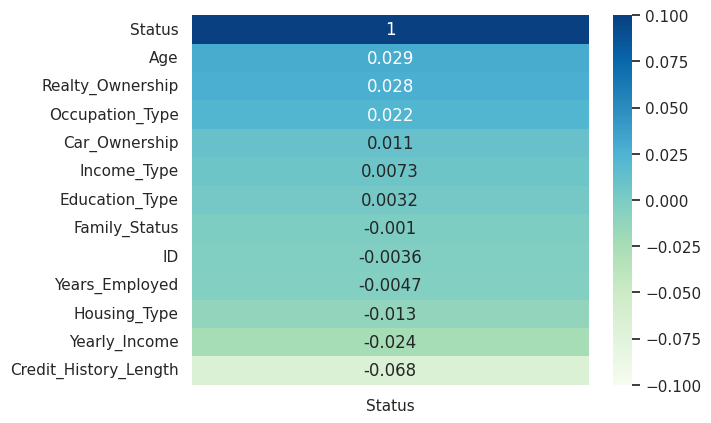

In [103]:
sns.heatmap(app_record_data.corr()[['Status']].sort_values\
            (by='Status', ascending=False), vmin=-0.1, vmax=0.1, annot=True, cmap='GnBu')

### 4.3: Show scatterplots to illustrate data correlation and distribution

In [104]:
sample_df = app_record_data.sample(frac=0.002, random_state=20)
sample_df.columns

Index(['ID', 'Car_Ownership', 'Realty_Ownership', 'Yearly_Income',
       'Income_Type', 'Education_Type', 'Family_Status', 'Housing_Type', 'Age',
       'Years_Employed', 'Occupation_Type', 'Credit_History_Length', 'Status'],
      dtype='object')

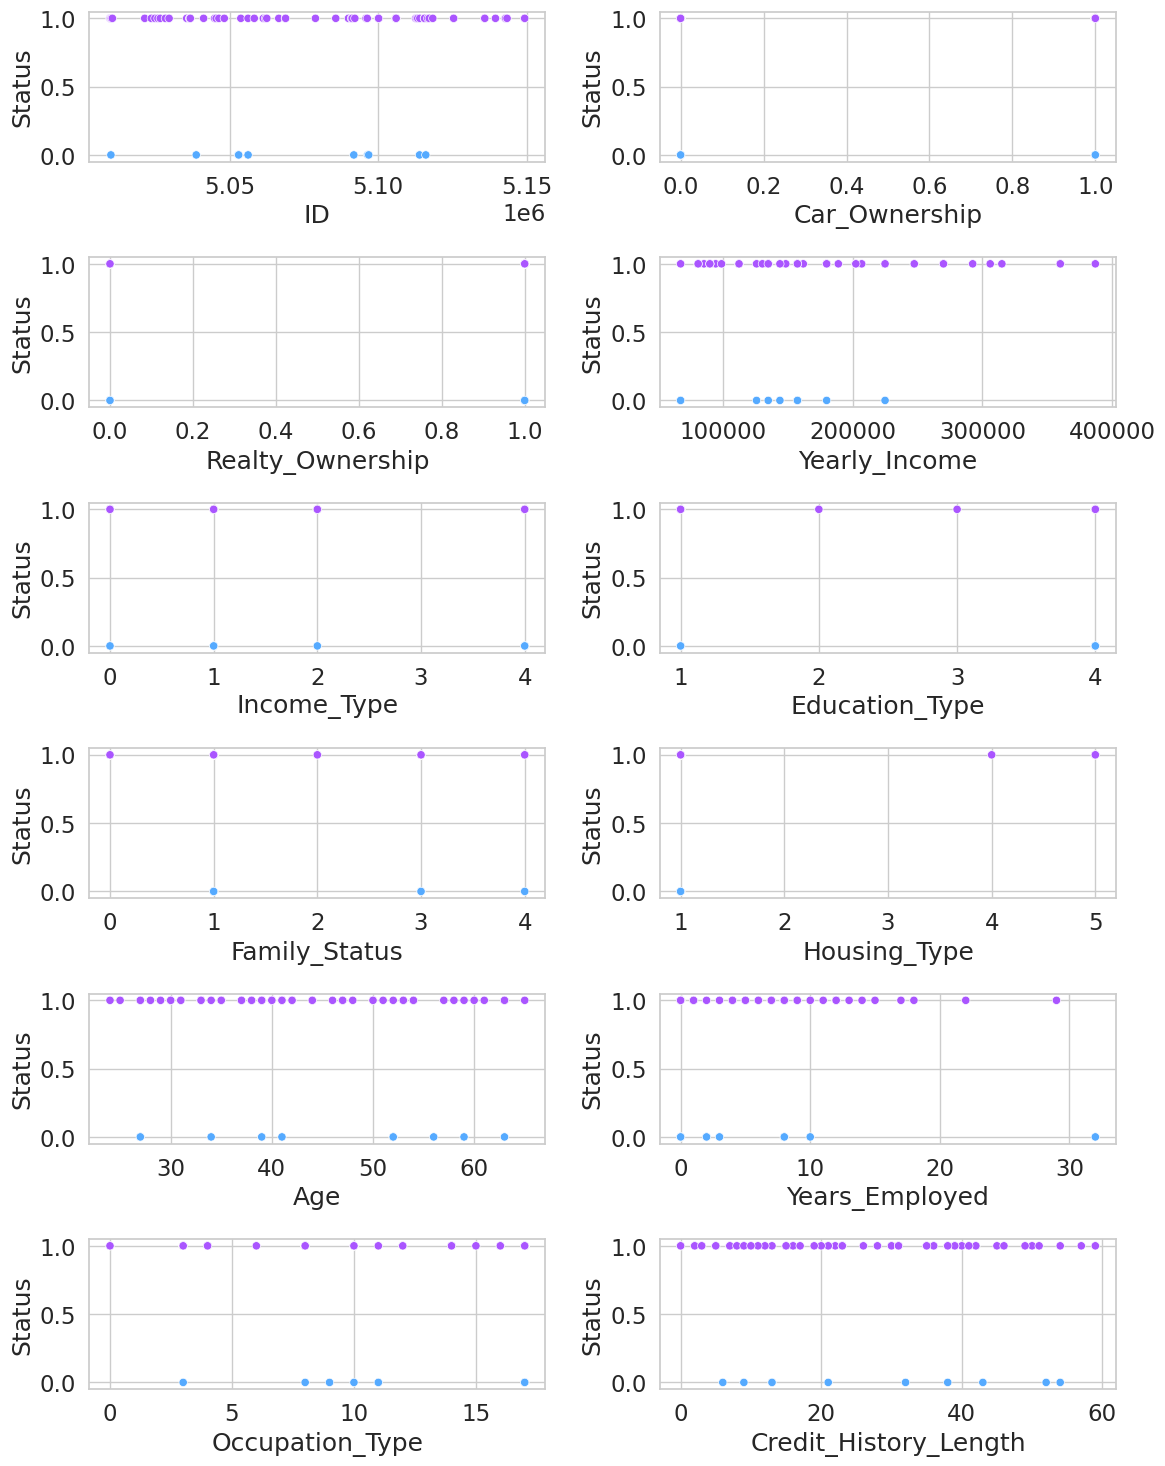

In [105]:
sns.set(font_scale=1.5)
sns.set_style('whitegrid')

num_rows = 6
num_columns = 2
fig, axes = plt.subplots(num_rows, num_columns, figsize=(num_columns * 6, 15))

for i, c in enumerate(sample_df.columns[ :-1]):
    row = i // num_columns
    column = i % num_columns

    sns.scatterplot(data=sample_df, x=c, y=app_record_data["Status"], hue=app_record_data["Status"], palette='cool', ax=axes[row, column], legend=False)

plt.tight_layout()
plt.show()

## Step 5: Separate data into training and test sets

The data in **app_record.data.csv** will be divided as follows:

1.) **70%** of the data will lie in the **training set**.

2.) **30%** of the data will lie in the **test set**.

In [106]:
X = app_record_data.drop(["Status"], axis=1)
y = app_record_data["Status"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 91)

#### **Total number of rows**

In [107]:
y.value_counts()

,count
Status,
1,32166
0,4291


#### **Data rows to be *trained***

In [108]:
y_train.value_counts()

,count
Status,
1,22534
0,2985


#### **Data rows to be *tested***

In [109]:
y_test.value_counts()

,count
Status,
1,9632
0,1306


## Step 6: Standardize the training and test data

In [110]:
data_scaler = preprocessing.StandardScaler()

scaled_X_train = data_scaler.fit_transform(X_train)
scaled_X_test = data_scaler.transform(X_test)

## Step 7: Visualize the standardized training data

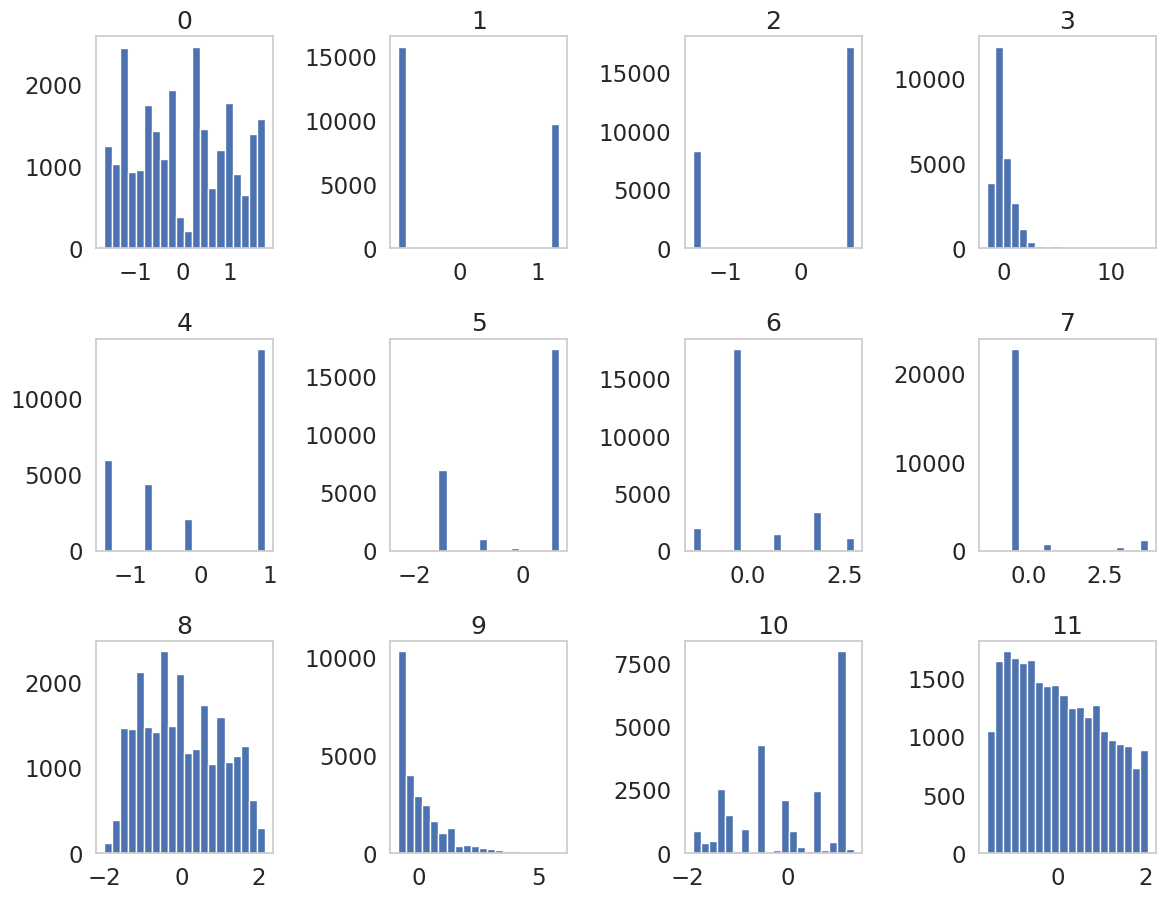

In [111]:
%matplotlib inline

scaled_X_train_df = pd.DataFrame(scaled_X_train)

histogram = scaled_X_train_df.hist(figsize=(12, 12), layout=(4, 4), bins=20, grid=False)

plt.tight_layout()
plt.show()

## Step 8: Design and Train the Model

For the Credit Card Approval project, a standard **kNeighborsClassifier** (or kNN) model will be used to predict whether clients should be approved
or rejected for a credit card. The kNeighborsClassifier model is a relatively simple tool for performing binary classification on a dataset.

In [112]:
knn_model = KNeighborsClassifier()
knn_model.fit(scaled_X_train, y = y_train)

KNeighborsClassifier()

In [113]:
train_predictions = knn_model.predict(X=scaled_X_train)
test_predictions = knn_model.predict(X=scaled_X_test)

## Step 9: Evaluate the Model's Performance

### 9.1: Compare predicted values to the actual values

#### **Comparison for training data**

In [114]:
# Predicted values
train_predictions[0:15]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [115]:
# Expected values.
y_train[0:15]

,Status
14410,1
26385,1
10709,1
35235,1
19728,1
23464,1
22632,1
12829,1
2746,1
4465,1


#### **Comparison for testing data**

In [116]:
# Predicted values
test_predictions[0:15]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [117]:
# Actual values
y_test[0:15]

,Status
28611,1
29860,1
28411,1
21610,0
35866,1
35054,1
34858,1
35614,1
5289,1
10707,1


### 9.3: Show results for metrics used

#### **F1 score**

The F1 score is a powerful metric to evaluate this model's performance because the two classes, 1 (good/approved) and 0
(bad/denied), are significantly imbalanced. To elaborate, only around 12% of the data was classified with a **0**, whereas
the other 88% was classified with a **1**. Using metrics such as accuracy would not be appropriate
since they provide good analysis for *equally distributed* classes in binary classification problems. It is not the case for this particular
problem. For these reasons, we use the **F1 score** to measure the kNeighborsClassifier model's performance.

In [118]:
training_f1_score = round(f1_score(y_train, train_predictions), 4)
testing_f1_score = round(f1_score(y_test, test_predictions), 4)

print("Training set F1-score: ", training_f1_score)
print("Test set F1-score: ", testing_f1_score)

Training set F1-score:  0.9458
Test set F1-score:  0.9302


#### **Precision score**

In [119]:
training_precision = round(precision_score(y_train, train_predictions), 4)
testing_precision = round(precision_score(y_test, test_predictions), 4)

print("Training set precision: ", training_precision)
print("Test set precision: ", testing_precision)

Training set precision:  0.9092
Test set precision:  0.8917


#### **Stratified k-Fold Cross Validation**

**Stratified k-Fold Cross Validation** is similar to the traditional method of k-Fold Cross Validation. However, I decided to
utilize the stratified variant due to the imbalanced nature of the two classes.

In [120]:
stratified_kfold = StratifiedKFold(n_splits=12, random_state=10, shuffle=True)

k_fold_scores = cross_val_score(estimator=knn_model, X=X, y=y, cv=stratified_kfold)
k_fold_scores

array([0.87726226, 0.88314681, 0.88281764, 0.87755102, 0.88183015,
       0.87985517, 0.88183015, 0.87886768, 0.88610928, 0.879526  ,
       0.88215932, 0.88578012])

In [121]:
print(f"Accuracy (Stratified k-Fold Cross Validation): {k_fold_scores.mean():.3%}")

Accuracy (Stratified k-Fold Cross Validation): 88.139%


## Step 10: Adjust hyperparameters and find the best configuration

We will run the KNeighborsClassifier model with seven different hyperparameter tunes. Seven different values of **k**:
1, 3, 5, 10, 20, 50, and 100 will be used. The purpose is to see which hyperparameter setups (if any) perform better than the
default setup in Step 8, then determine the best configuration.

### 10.1: Declare multiple k-values for model execution

In [122]:
k_values = np.array([1, 3, 5, 10, 20, 50, 100])

# These arrays will be converted in DataFrames, which will then be used to create a table of results.
training_f1_scores = np.zeros(len(k_values))
testing_f1_scores = np.zeros(len(k_values))
training_precisions = np.zeros(len(k_values))
testing_precisions = np.zeros(len(k_values))
k_fold_score_means = np.zeros(len(k_values))

### 10.2: Train the model with a respective k-value

In [123]:
i = 0
for k in k_values:
    stratified_kfold = StratifiedKFold(n_splits=12, random_state=10, shuffle=True)
    knn_tuned_model = KNeighborsClassifier(n_neighbors=k)
    knn_tuned_model.fit(scaled_X_train, y = y_train)
    print(f"k = {k}\t\tStarting model execution...")

    train_predictions = knn_tuned_model.predict(X=scaled_X_train)
    test_predictions = knn_tuned_model.predict(X=scaled_X_test)

    training_f1_scores[i] = round(f1_score(y_train, train_predictions), 4)
    testing_f1_scores[i] = round(f1_score(y_test, test_predictions), 4)

    training_precisions[i] = round(precision_score(y_train, train_predictions), 4)
    testing_precisions[i] = round(precision_score(y_test, test_predictions), 4)

    k_fold_scores = cross_val_score(estimator=knn_tuned_model, X=X, y=y, cv=stratified_kfold)
    k_fold_score_means[i] = round(k_fold_scores.mean(), 3)

    print(f"\t\tExecution complete")

    i += 1

k = 1		Starting model execution...
		Execution complete
k = 3		Starting model execution...
		Execution complete
k = 5		Starting model execution...
		Execution complete
k = 10		Starting model execution...
		Execution complete
k = 20		Starting model execution...
		Execution complete
k = 50		Starting model execution...
		Execution complete
k = 100		Starting model execution...
		Execution complete


### 10.3: Visualize the metrics from all 7 tuned models

In [124]:
df_k_value = pd.DataFrame(k_values.T, columns=["k"])
df_train_f1 = pd.DataFrame(training_f1_scores.T, columns=["Training F1 Score"])
df_test_f1 = pd.DataFrame(testing_f1_scores.T, columns=["Testing F1 Score"])
df_train_precision = pd.DataFrame(training_precisions.T, columns=["Training Precision"])
df_test_precision = pd.DataFrame(testing_precisions.T, columns=["Testing Precision"])
df_mean_kfold = pd.DataFrame(k_fold_score_means.T, columns=["Mean Cross Validation Score"])

combined_df = pd.concat([df_k_value, df_train_f1, df_test_f1, df_train_precision, df_test_precision, df_mean_kfold], axis=1)
combined_df.reset_index(drop=True, inplace=True)

combined_df

,k,Training F1 Score,Testing F1 Score,Training Precision,Testing Precision,Mean Cross Validation Score
0,1,1.0000,0.9125,1.0000,0.9089,0.855
1,3,0.9554,0.9264,0.9317,0.9003,0.877
2,5,0.9458,0.9302,0.9092,0.8917,0.881
3,10,0.9397,0.9337,0.8946,0.8860,0.876
4,20,0.9381,0.9360,0.8844,0.8813,0.880
5,50,0.9379,0.9365,0.8830,0.8806,0.882
6,100,0.9379,0.9365,0.8830,0.8806,0.882
